In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set_style("whitegrid")
random.seed(17)

from scipy.stats import pearsonr
from scipy.spatial import distance
from matplotlib import style 
from collections import defaultdict
style.use('default')

# nltk libraries and sources
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
import nltk
from nltk.corpus import brown, reuters, gutenberg
nltk.download('gutenberg')
nltk.download('reuters')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import sys
sys.path.append('../')
import utils.utils as utils
import utils.preprocessing as preprocessing

[nltk_data] Downloading package gutenberg to /Users/myra/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package reuters to /Users/myra/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package brown to /Users/myra/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/myra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/myra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/myra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/myra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/myra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger i

In [2]:
data_root_folder = "../data/"
stopwords_en = set(stopwords.words('english'))

# Read data

In [3]:
data_train, data_dev = utils.load_data(data_root_folder)
articles = utils.load_articles()
# lower textual data
data_train['essay'] = data_train['essay'].apply(lambda x: x.lower())
articles['text'] = articles['text'].apply(lambda x: x.lower())

# tokenized version of the text
data_train = preprocessing.tokenize_data(data_train, 'essay')
articles = preprocessing.tokenize_data(articles, 'text')

# word lematizing
data_train = preprocessing.lemmatize_data(data_train, 'essay_tok')
articles = preprocessing.lemmatize_data(articles, 'text_tok')

In [4]:
empathy_lex, distress_lex = utils.load_empathy_distress_lexicon(data_root_folder="../data/")

# Analysis of PCA for empathy / distress dim

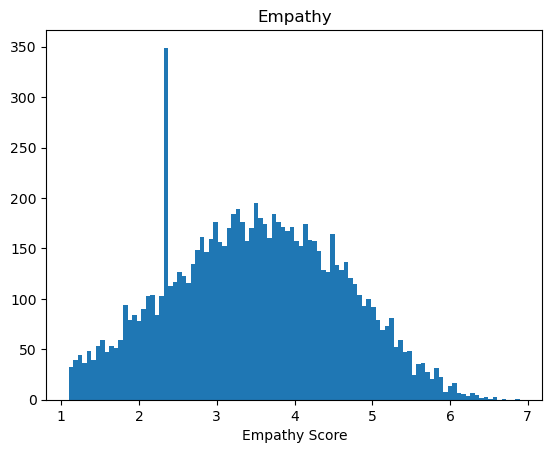

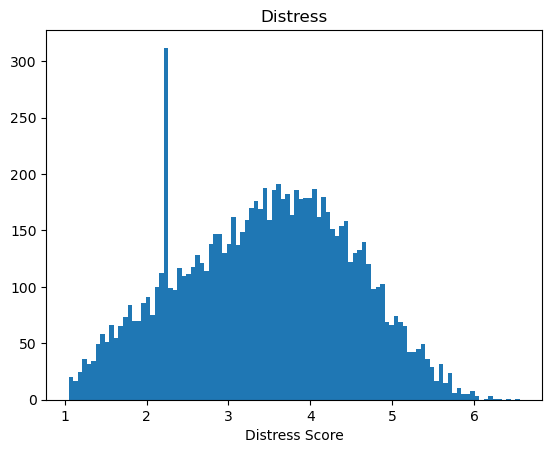

In [5]:
values = list(empathy_lex.values())
plt.hist(values, bins = 100)
plt.xlabel('Empathy Score')
plt.title('Empathy')
plt.show()

values = list(distress_lex.values())
plt.hist(values, bins = 100)
plt.xlabel('Distress Score')
plt.title('Distress')
plt.show()

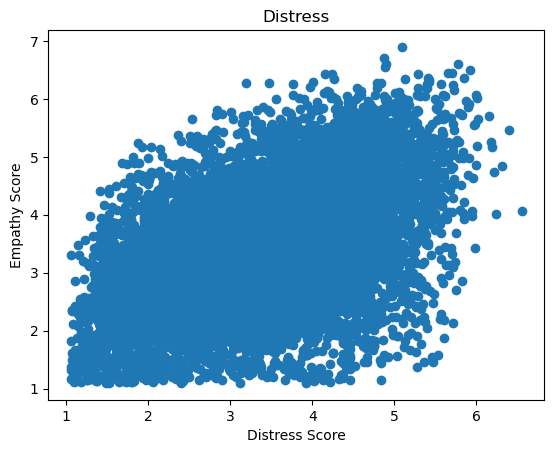

In [13]:
values_emp = list(empathy_lex.values())

values_dis = list(distress_lex.values())
plt.scatter(values_dis, values_emp)


plt.ylabel('Empathy Score')
plt.xlabel('Distress Score')
plt.title('Distress')
plt.show()

In [7]:
print('\nEmpathy min scores')
sorted_empathy_dict_min = sorted(empathy_lex.items(), key=lambda item: item[1])
print(sorted_empathy_dict_min[:20])

print('\nEmpathy max scores')
sorted_empathy_dict_max = [(word, score) for word, score in sorted(empathy_lex.items(), key=lambda item: item[1], reverse=True)]
print(sorted_empathy_dict_max[:20])

print('\nDistress min scores')
sorted_distress_dict_min = [(word, score) for word, score in sorted(distress_lex.items(), key=lambda item: item[1])]
print(sorted_distress_dict_min[:20])

print('\nDistress max scores')
sorted_distress_dict_max = [(word, score) for word, score in sorted(distress_lex.items(), key=lambda item: item[1], reverse=True)]
print(sorted_distress_dict_max[:20])


Empathy min scores
[('joke', 1.09719309808247), ('worrying', 1.09822604212761), ('wacky', 1.09834762838549), ('bizarre', 1.09899483576479), ('stupidest', 1.10055367715272), ('pretending', 1.10592706513712), ('amusing', 1.1075202677636), ('fart', 1.10835499265131), ('fool', 1.10935816166989), ('gag', 1.11046663620353), ('except', 1.11331137250805), ('trades', 1.11520438106863), ('fake', 1.11851354344769), ('clown', 1.12048360110033), ('pretended', 1.12538681842619), ('bother', 1.12801179613834), ('dishonest', 1.12949620687347), ('anet', 1.12973836640722), ('slightest', 1.13014492297517), ('either', 1.13167908373534)]

Empathy max scores
[('lukemia', 6.89719309808247), ('lakota', 6.70043879862207), ('healing', 6.59682135519217), ('gaza', 6.59396010702993), ('barakat', 6.55846078878426), ('grieve', 6.5014269631434), ('dubose', 6.43950677509016), ('zambia', 6.43938359567666), ('duckworth', 6.43804711087136), ('heartbreaks', 6.43290793350761), ('shipwrecks', 6.42217383922169), ('empathize'

In [8]:
from nltk.stem import *
from nltk.stem.porter import *

def stem_words(words):
    """Stem words, capable of handling different types. words can either be
    of type str
    or type list(str)
    or type list((str, score))
    where the str object will be stemmed

    Args:
        words (list((str, float)) or list(str) or str): The words as described above

    Returns:
        list((str, float)) or list(str) or str: The stemmed words, returned in the same type as the input type
    """
    # words -> list of words
    # or words -> liste of tuples (list(str, float))
    # or words -> str
    stemmer = PorterStemmer()
    if isinstance(words, list):
        if isinstance(words[0], tuple):
            word_stems = [(stemmer.stem(w), score) for (w, score) in words]
        elif isinstance(words[0], str):
            word_stems = [stemmer.stem(w) for w in words]
        else:
            print('MyWarning in stem_words(): variable "words" should be a list of strings or list of tuples. Returning empty list.')
            word_stems = []
    elif isinstance(words, str):
        word_stems = stemmer.stem(words)
    else:
        print('MyWarning in stem_words(): variable "words" should be a list of strings or list of tuples. Returning empty list.')
        word_stems = []
    return word_stems


def remove_dublicates(words, sorting='max'):
    """Remove dublikates from a (sorted) list.

    Args:
        words (list((str, float)) or list(str)): The list of words
        sorting (str, optional): The sorting mechanism. Defaults to 'max'.

    Returns:
        _type_: _description_
    """
    # words -> liste of tuples (list(str, float))
    # the way to sort the scores (item[1])
    distinct_words = []
    if isinstance(words, list):
        if isinstance(words[0], tuple):
            # sort to make sure, we are returning the word with the highest/lowest value
            reverse = True if sorting=='max' else False
            sorted_words = [(word, score) for word, score in sorted(words, key=lambda item: item[1], reverse=reverse)]
            set_words = list(set([word for word, score in sorted_words]))
            for word, score in sorted_words:
                if word in set_words:
                    set_words.remove(word)
                    distinct_words.append((word, score))
        if isinstance(words[0], str):
            reverse = True if sorting=='max' else False
            set_words = list(set([word for word in words]))
            for word in words:
                if word in set_words:
                    set_words.remove(word)
                    distinct_words.append((word))

    return distinct_words


def get_verbs(words, blacklist=[]):
    """Get the words from a list

    Args:
        words (list((str, float)) or list(str)): The list of words

    Returns:
        list((str, float)) or list(str): The verbs
    """
    verbs = []
    if isinstance(words, list):
        if isinstance(words[0], tuple):
            for word, score in words:
                if word not in blacklist:
                    verb_synset_ls = wn.synsets(word, pos=wn.VERB)  # if a verb can be found in the list
                    if len(verb_synset_ls) >= 1:
                        #print(f'{word} is a verb (score: {score})\n Synset: {verb_synset_ls}\n')
                        verbs.append((word, score))
        if isinstance(words[0], str):
            for word in words:
                if word not in blacklist:
                    verb_synset_ls = wn.synsets(word, pos=wn.VERB)
                    if len(verb_synset_ls) >= 1:
                        verbs.append(word)

    return verbs

def select_words(lexicon, word_count):
    # return min and max sorted words with length of word_count
    blacklist = ['blanket', 'home', 'shipwreck', 'cub']
    def __get_words(sorting):
        reverse = True if sorting=='max' else False
        words_sorted = [(word, score) for word, score in sorted(lexicon.items(), key=lambda item: item[1], reverse=reverse)]
        word_stems = stem_words(words_sorted)
        distinct_word_stems = remove_dublicates(word_stems, sorting=sorting)
        distinct_verbs = get_verbs(distinct_word_stems, blacklist=blacklist)
        return distinct_verbs[:word_count]
    words_min = __get_words(sorting='min')
    words_max = __get_words(sorting='max')
    return words_min, words_max

dis_min, dis_max = select_words(distress_lex, 10)
print('dis_min:\n', dis_min)
print('dis_max:\n', dis_max)
emp_min, emp_max = select_words(empathy_lex, 10)
print('emp_min:\n', emp_min)
print('emp_max:\n', emp_max)

# TODO: Maybe look at lemmas in wordnet and see if one of them is a verb, if yes, take that. If not, don't take it
# for example blankets is not a verb in the lexicon with totally different meaning, but if we stem it and then do verb -> it is a verb but score is for a word with a totally different mean
# if nothing works, just manualy exlcude them

dis_min:
 [('guess', 1.05549069686362), ('hack', 1.05883270118414), ('chime', 1.06075113799987), ('interest', 1.07468670487951), ('except', 1.09226115405961), ('sort', 1.10965570859975), ('reason', 1.13866035355703), ('well', 1.14269635205938), ('stuff', 1.14522945508256), ('use', 1.16195525391104)]
dis_max:
 [('mistreat', 6.31178414562011), ('malnourish', 6.01796802838039), ('assault', 6.01273732117985), ('distress', 6.00846699078174), ('kill', 5.95793654260942), ('screech', 5.9534384145839), ('murder', 5.91287890035859), ('compass', 5.87626312442102), ('rape', 5.8375670680054), ('slaughter', 5.83686787143775)]
emp_min:
 [('joke', 1.09719309808247), ('pretend', 1.10592706513712), ('fart', 1.10835499265131), ('fool', 1.10935816166989), ('gag', 1.11046663620353), ('except', 1.11331137250805), ('trade', 1.11520438106863), ('fake', 1.11851354344769), ('clown', 1.12048360110033), ('bother', 1.12801179613834)]
emp_max:
 [('heal', 6.59682135519217), ('sorrow', 6.29975746152872), ('wound', 6.

# Get word frequency

In [9]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


corpus = reuters.words() + brown.words() + gutenberg.words()
fdist = FreqDist(word.lower() for word in corpus if word.isalnum())
fdist

FreqDist({'the': 272831, 'and': 149943, 'of': 144458, 'to': 110615, 'in': 84170, 'a': 82258, 'that': 46932, 'for': 42798, 'it': 42167, 'he': 40620, ...})

In [10]:
f"{fdist.freq('rape'):.10f}"


'0.0000042884'

In [11]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [12]:
import json
pca_df = pd.read_csv('../empdim_settings.csv')
pca_df = pca_df.fillna(value={'notes':'all_random'})
pca_df

FileNotFoundError: [Errno 2] No such file or directory: '../empdim_settings.csv'

In [ ]:

# for each run get the principal component with the higest pearson_r
idx = pca_df.groupby(['timestamp', 'notes'])['pca_pearsonr'].transform(lambda x: max(np.abs(x))) == np.abs(pca_df['pca_pearsonr'])
pca_df[idx]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
# for each run get the principal component with the higest pearson_r
idx = pca_df.groupby('timestamp')['pca_var'].transform(lambda x: max(x)) == np.abs(pca_df['pca_var'])
pca_df[idx]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
from nltk import pos_tag

from nltk.corpus import wordnet as wn

word = 'shipwreck'

lemmas = wn.lemmas(word)
verb_synset_ls = wn.synsets(word, pos=wn.VERB)

print('lemmas:', lemmas)
print()
print('verb_synset_ls:', verb_synset_ls)

lemmas: [Lemma('shipwreck.n.01.shipwreck'), Lemma('shipwreck.n.02.shipwreck'), Lemma('shipwreck.n.03.shipwreck'), Lemma('shipwreck.v.01.shipwreck'), Lemma('shipwreck.v.02.shipwreck'), Lemma('shipwreck.v.03.shipwreck'), Lemma('shipwreck.v.04.shipwreck')]

verb_synset_ls: [Synset('shipwreck.v.01'), Synset('shipwreck.v.02'), Synset('shipwreck.v.03'), Synset('shipwreck.v.04')]


# Select words from middle of data set
1. Get 'hard coded' middle
2. get middle based on the values for min / max we chose 

**Question**: Does it lead to better results if we have smaples on the whole range? Not only three clusters

# Select balanced scores from lexicon


Amount of subsampled data: 992


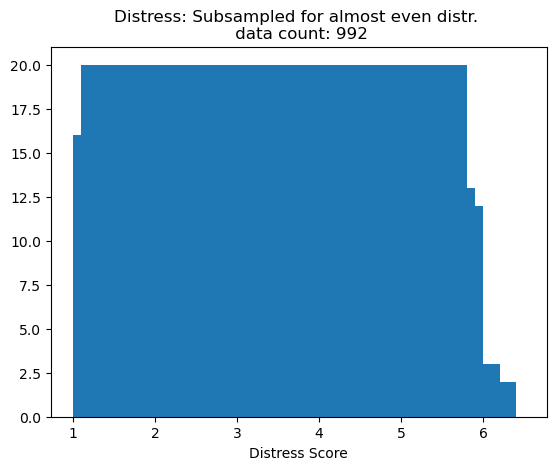

In [ ]:
import decimal
import math
import random
random.seed(17)

def subsample_even_score_distr(lexicon, datapoints_per_bin, bin_size, return_binned_data=False, return_bins=False):
    """_summary_

    Args:
        lexicon (_type_): _description_
        datapoints_per_bin (_type_): _description_
        bin_size (_type_): _description_
        return_binned_data (bool, optional): If set to True, the data will be returned as a 
                                    two dimensional list, stored in ther bins. If false, a 
                                    one dimensional list will be returned. Defaults to False.
    """
    # - create list of tuples: list((str, float)) -
    words_sorted = [(word, score) for word, score in sorted(lexicon.items(), key=lambda item: item[1])]

    # - create bins -
    decimal_count = abs(decimal.Decimal(str(bin_size)).as_tuple().exponent)
    min_score = min([item[1] for item in words_sorted])
    max_score = max([item[1] for item in words_sorted])
    bins_start = math.floor(min_score * (10**decimal_count)) / (10**decimal_count)
    bins_end = math.ceil(max_score * (10**decimal_count)) / (10**decimal_count)
    # add the end point to the bins as well, to get the upper range for the elements
    # this will be removed later on, since it is not actually a bin
    bins = np.arange(bins_start, bins_end + bin_size, bin_size)

    # - divide data into bins - 
    binned_data = [[] for i in range(len(bins))]
    for word, score in words_sorted:
        min_idx = np.where(bins <= score)[0]
        max_idx = np.where(bins > score)[0] - 1
        item_bin_idx = np.intersect1d(min_idx, max_idx)[0]
        binned_data[item_bin_idx].append((word, score))
    # remove last bin, because it is 0 anyways, just needed it for the calculation
    binned_data = binned_data[:-1]
    bins = bins[:-1]

    # - shuffle the bins -
    for bin in binned_data:
        random.shuffle(bin)
        
    # - select data points from those bins of size <datapoints_per_bin> -
    binned_data = [bin[:datapoints_per_bin] for bin in binned_data]
    
    if return_binned_data:
        return binned_data if not return_bins else (binned_data, bins)

    unbinned_data = [item for bin in binned_data for item in bin]
    return unbinned_data if not return_bins else (unbinned_data, bins)


subsampled_lex, bins = subsample_even_score_distr(distress_lex, datapoints_per_bin=20, bin_size=0.1, return_bins=True)
print(f'Amount of subsampled data: {len(subsampled_lex)}')
values = list([score for word, score in subsampled_lex])
plt.hist(values, bins=bins)
plt.xlabel('Distress Score')
plt.title(f'Distress: Subsampled for almost even distr. \n data count: {len(values)}')
plt.show()

Amount of subsampled data: 756


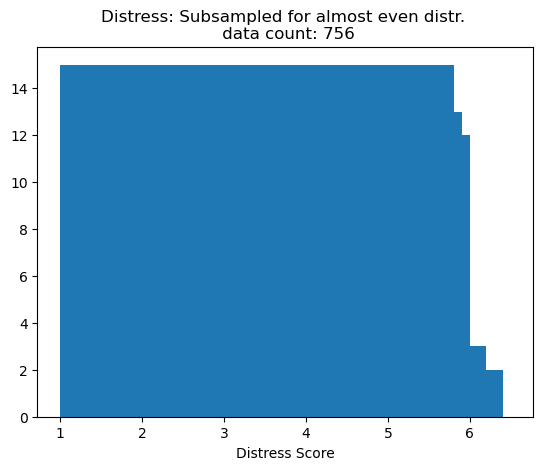

In [ ]:

# even less daat points to make it more even
subsampled_lex, bins = subsample_even_score_distr(distress_lex, datapoints_per_bin=15, bin_size=0.1, return_bins=True)
print(f'Amount of subsampled data: {len(subsampled_lex)}')
values = list([score for word, score in subsampled_lex])
plt.hist(values, bins=bins)
plt.xlabel('Distress Score')
plt.title(f'Distress: Subsampled for almost even distr. \n data count: {len(values)}')
plt.show()

### Original histogram of the scores for comparison

Amount of subsampled data: 9356


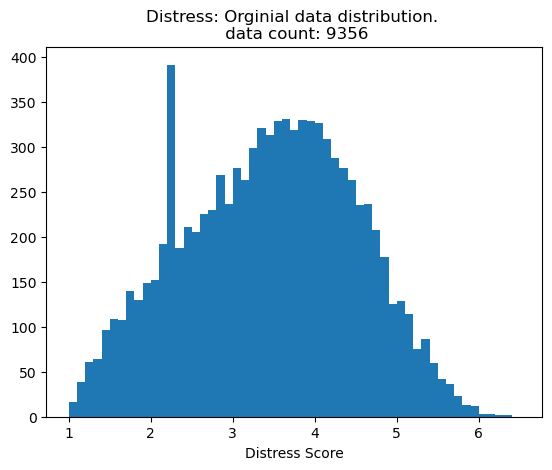

In [ ]:
values = list(distress_lex.values())
print(f'Amount of subsampled data: {len(values)}')
plt.hist(values, bins=bins)
plt.xlabel('Distress Score')
plt.title(f'Distress: Orginial data distribution. \n data count: {len(values)}')
plt.show()

In [ ]:
input = [('test', 5.5), ('cake', 4.3)]
[(word, score) for word, score in sorted(input, key=lambda item: item[1])]

[('cake', 4.3), ('test', 5.5)]

In [ ]:
print('correlate for even subsamples')
even_subsamples = subsample_even_score_distr(distress_lex, datapoints_per_bin=20, bin_size=0.1, return_bins=False)
#print(even_subsamples)
sentences_input = [item[0] for item in even_subsamples]
#print(sentences_input[:10])
true_labels = [item[1] for item in even_subsamples]
#print(true_labels[:10])

correlate for even subsamples


# Analyse outcome

In [ ]:
pca_outcome = pd.read_csv('../empdim_results_experiment.csv')
pca_outcome[:50]

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
0,0,2022-06-06_102824,3,distress,1000,5,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.225871,4.925691e-13
1,1,2022-06-06_102824,3,distress,1000,5,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.223853,0.064280,4.212581e-02
2,2,2022-06-06_102824,3,distress,1000,5,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.137043,-0.015687,6.202622e-01
3,0,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.510175,2.468647e-51
4,1,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.223853,0.121537,8.121970e-04
5,2,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.137043,0.011966,7.425475e-01
6,0,2022-06-06_102824,3,distress,992,5,False,soft,NaN,1.0,all_words_even_20,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.531319,2.340230e-73
7,1,2022-06-06_102824,3,distress,992,5,False,soft,NaN,1.0,all_words_even_20,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.223853,0.130823,3.580736e-05
8,2,2022-06-06_102824,3,distress,992,5,False,soft,NaN,1.0,all_words_even_20,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.137043,-0.022662,4.758783e-01
9,0,2022-06-06_103049,3,distress,1000,10,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.274811,8.723424e-19


In [ ]:
# functions
def max_abs(x):
    x_abs = x * np.sign(x)
    max_idx = x_abs.argmax()
    maximum = x.iloc()[max_idx]
    return maximum

In [ ]:
idx = pca_outcome.groupby(['id', 'note'])['pca_pearsonr'].transform(lambda x: max(np.abs(x))) == np.abs(pca_outcome['pca_pearsonr'])
best_results = pca_outcome[idx]
best_results.loc[best_results.note == 'all_words_even_15']

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
3,0,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.510175,2.468647e-51
12,0,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.557377,6.352167e-63
21,0,2022-06-06_103303,3,distress,756,15,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.290193,-0.544012,1.874185e-59
30,0,2022-06-06_103524,3,distress,756,20,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.265652,-0.522372,3.722587e-54
39,0,2022-06-06_103738,3,distress,756,50,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.204278,0.469440,1.073018e-42
48,0,2022-06-06_104604,3,distress,756,5,False,soft,3.525099,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;flop;grass;tr...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.255829,-0.494772,6.258702e-48
57,0,2022-06-06_104821,3,distress,756,5,False,hard,3.803341,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;eat;insult;gr...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.248615,-0.515414,1.564857e-52
66,0,2022-06-06_105039,3,distress,756,10,False,soft,3.499412,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.268099,0.523901,1.617381e-54
75,0,2022-06-06_105253,3,distress,756,10,False,hard,3.803341,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.238716,0.517094,6.396647e-53
84,0,2022-06-06_105508,3,distress,756,15,False,soft,3.442147,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.247600,0.470665,6.131250e-43


##### Best vocab length is 10

In [ ]:
# what is the best length ---> 10
best_results.groupby(['note', 'vocab_size']).agg({'pca_pearsonr': max})


pca_pearsonr
note              vocab_size              
all_words_even_15 1               0.470221
                  2               0.430175
                  3               0.434948
                  5               0.510175
                  10              0.557377
                  15              0.473633
                  20              0.463347
                  50              0.477897
all_words_even_20 1               0.448353
                  2               0.414861
                  3               0.398444
                  5               0.531319
                  10              0.544123
                  15              0.510210
                  20              0.479764
                  50              0.451213
all_words_rand    1               0.264399
                  2               0.304896
                  3               0.281829
                  5               0.225871
                  10              0.274811
                  15              0.241754
                  20              0.273377
                  50              0.288676

In [ ]:
best_results.groupby(['note', 'vocab_size']).agg({'pca_pearsonr': max_abs})

pca_pearsonr
note              vocab_size              
all_words_even_15 1               0.470221
                  2               0.430175
                  3               0.434948
                  5              -0.515414
                  10             -0.570646
                  15             -0.544012
                  20             -0.522372
                  50              0.477897
all_words_even_20 1               0.448353
                  2               0.414861
                  3               0.398444
                  5               0.531319
                  10             -0.549217
                  15              0.510210
                  20              0.479764
                  50              0.451213
all_words_rand    1              -0.270916
                  2               0.304896
                  3               0.281829
                  5              -0.277155
                  10             -0.288441
                  15             -0.277907
                  20             -0.303261
                  50              0.288676

##### Best vocab_type is mm
##### Best correlation distribution is words even 15

In [ ]:

best_results.groupby(['note', 'vocab_type']).agg({'pca_pearsonr': max_abs})

pca_pearsonr
note              vocab_type              
all_words_even_15 mm             -0.570646
                  mmn             0.523901
                  range           0.470221
all_words_even_20 mm             -0.549217
                  mmn             0.510210
                  range           0.448353
all_words_rand    mm             -0.303261
                  mmn             0.288676
                  range           0.304896

### Best model for each vocab type

In [ ]:
best_results_15 = best_results.loc[best_results.note == 'all_words_even_15']
idx = best_results_15.groupby(['vocab_type'])['pca_pearsonr'].transform(max) == best_results_15['pca_pearsonr']
best_results_15[idx]


,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
12,0,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.557377,6.352167e-63
66,0,2022-06-06_105039,3,distress,756,10,False,soft,3.499412,1.0,all_words_even_15,False,0.00002,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.268099,0.523901,1.617381e-54
138,0,2022-06-06_112743,3,distress,756,1,False,soft,NaN,0.1,all_words_even_15,False,0.00002,range,guess;gripe;clue;type;case;falcon;correct;hija...,1.05549069686362;1.17744068559218;1.2623934568...,0,0.167842,0.470221,7.510738e-43


In [ ]:
best_results_15 = best_results.loc[(best_results.note == 'all_words_even_15') & (best_results.vocab_type == 'mmn')]
idx = best_results_15.groupby(['vocab_center_strategy'])['pca_pearsonr'].transform(max) == best_results_15['pca_pearsonr']
best_results_15[idx]

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
66,0,2022-06-06_105039,3,distress,756,10,False,soft,3.499412,1.0,all_words_even_15,False,0.00002,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.268099,0.523901,1.617381e-54
75,0,2022-06-06_105253,3,distress,756,10,False,hard,3.803341,1.0,all_words_even_15,False,0.00002,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.238716,0.517094,6.396647e-53


In [ ]:
# different leixcon
best_results_15 = best_results.loc[best_results.note == 'all_words_even_15']
idx = best_results_15.groupby(['use_freq_dist'])['pca_pearsonr'].transform(max) == best_results_15['pca_pearsonr']
best_results_15[idx]['vocab_words']


12     guess;hack;chime;interest;except;sort;reason;w...
246    guess;interest;except;sort;reason;well;stuff;u...
Name: vocab_words, dtype: object

# Plot vocabulary

In [ ]:
vocab = [('pipe', 1.77968560635602), ('suit', 1.47227748687615), ('hunch', 1.50766066516327), ('possess', 2.46739249130238), ('affect', 2.55366746135807), ('bud', 2.10790133516399), ('tick', 3.96827736629441), ('room', 3.97625900157487), ('cat', 3.42143991121306), ('spread', 4.45737586340529), ('assess', 4.15811746035681), ('defect', 4.34387243972072), ('picket', 5.20868869012816), ('sicken', 5.55851625097397), ('screech', 5.9534384145839), ('mistreat', 6.15267162558315), ('malnourish', 6.01796802838039)]
vocab

[('pipe', 1.77968560635602),
 ('suit', 1.47227748687615),
 ('hunch', 1.50766066516327),
 ('possess', 2.46739249130238),
 ('affect', 2.55366746135807),
 ('bud', 2.10790133516399),
 ('tick', 3.96827736629441),
 ('room', 3.97625900157487),
 ('cat', 3.42143991121306),
 ('spread', 4.45737586340529),
 ('assess', 4.15811746035681),
 ('defect', 4.34387243972072),
 ('picket', 5.20868869012816),
 ('sicken', 5.55851625097397),
 ('screech', 5.9534384145839),
 ('mistreat', 6.15267162558315),
 ('malnourish', 6.01796802838039)]

[0.09250095 0.30419128 0.00219058 0.32018426 0.25109067 0.26084961
 0.21254124 0.24159639 0.27895659 0.46179254 0.2510543  0.04485456
 0.13734371 0.78449439 0.07273462 0.84657717 0.09574005]


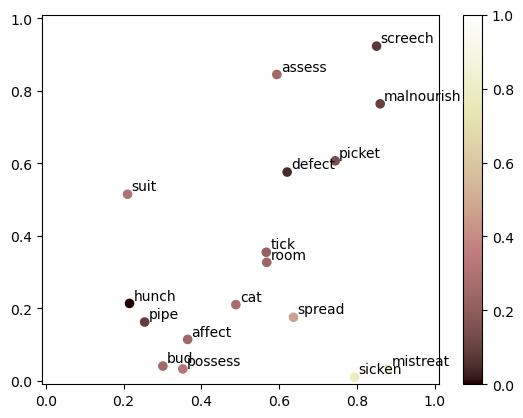

In [ ]:
def scatter_vocab(vocab, y, colormap='pink'):
    offset = 0.01
    scores = [item[1] for item in vocab]
    scores = np.array(scores) / 7 # normaized scores
    words = [item[0] for item in vocab]

    cm = plt.cm.get_cmap(colormap)
    xy = range(20)
    z = xy
    dist = np.abs(scores - random_y)
    print(dist)
    sc = plt.scatter(scores, random_y, c=dist, vmin=0, vmax=1, s=35, cmap=cm)

    for i, word in enumerate(words):
        plt.annotate(word, (scores[i]+offset, random_y[i]+offset))

    plt.ylim(0-offset,1+offset)
    plt.xlim(0-offset,1+offset)

    # colorbar means übereinstimmung der scores
    plt.colorbar(sc)


random_y = np.array([random.uniform(0, 1) for y in range(len(vocab))])
scatter_vocab(vocab, random_y)

In [ ]:
# Settings of vocabulary to correlate

runs = ['2022-06-07_064647', '2022-06-06_103049']
# show the results for them

runs_to_compare = pca_outcome.loc[pca_outcome.note == 'all_words_even_15']
runs_to_compare = runs_to_compare.loc[runs_to_compare.id.isin(runs)]
runs_to_compare

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
12,0,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.557377,6.352167e-63
13,1,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.131439,0.117632,1.194275e-03
14,2,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.101153,0.024789,4.961425e-01
273,0,2022-06-07_064647,3,distress,756,10,False,soft,NaN,0.1,all_words_even_15,True,0.000005,mm,guess;interest;except;sort;reason;well;stuff;u...,1.05549069686362;1.07468670487951;1.0922611540...,0,0.295873,-0.570646,1.579475e-66
274,1,2022-06-07_064647,3,distress,756,10,False,soft,NaN,0.1,all_words_even_15,True,0.000005,mm,guess;interest;except;sort;reason;well;stuff;u...,1.05549069686362;1.07468670487951;1.0922611540...,1,0.127739,0.156673,1.508603e-05
275,2,2022-06-07_064647,3,distress,756,10,False,soft,NaN,0.1,all_words_even_15,True,0.000005,mm,guess;interest;except;sort;reason;well;stuff;u...,1.05549069686362;1.07468670487951;1.0922611540...,2,0.099072,-0.194087,7.494069e-08


# Correlate the different setups (mutliple principle components)

: 

Amount of subsampled data: 756


NameError: name 'PCAArguments' is not defined

Amount of subsampled data: 756
